In [58]:
import awkward as ak
import numpy as np
import time
import coffea
import uproot
import hist
import vector
print("awkward version ", ak.__version__)
print("coffea version ", coffea.__version__)
from coffea import util, processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from collections import defaultdict
import pickle
from distributed.diagnostics.plugin import UploadDirectory
import os

awkward version  1.7.0
coffea version  0.7.11


In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
from smp_utils import *
from cms_utils import *
from jet_output_lib import *
from jet_output import *

In [61]:
f = uproot.open("/mnt/data/cms/store/mc/RunIISummer20UL16NanoAODv9/DYJetsToLL_M-50_HT-100to200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/260000/18D0A087-30BD-FE4E-B447-5F493C2D2794.root")
f["Events"].keys()

['run',
 'luminosityBlock',
 'event',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_njets25',
 'HTXS_njets30',
 'nboostedTau',
 'boostedTau_chargedIso',
 'boostedTau_eta',
 'boostedTau_leadTkDeltaEta',
 'boostedTau_leadTkDeltaPhi',
 'boostedTau_leadTkPtOverTauPt',
 'boostedTau_mass',
 'boostedTau_neutralIso',
 'boostedTau_phi',
 'boostedTau_photonsOutsideSignalCone',
 'boostedTau_pt',
 'boostedTau_puCorr',
 'boostedTau_rawAntiEle2018',
 'boostedTau_rawIso',
 'boostedTau_rawIsodR03',
 'boostedTau_rawMVAnewDM2017v2',
 'boostedTau_rawMVAoldDM2017v2',
 'boostedTau_rawMVAoldDMdR032017v2',
 'boostedTau_charge',
 'boostedTau_decayMode',
 'boostedTau_je

In [62]:
a = f["Events"]
a

<TTree 'Events' (1504 branches) at 0x7f895a671eb0>

In [69]:
a["GenJet_pt"].array(library="np")[113]

array([83.56933 , 65.129776, 32.981255, 22.489328, 16.081968],
      dtype=float32)

In [70]:
a["Jet_pt"].array(library="np")[113]

array([111.6875  ,  39.09375 ,  38.5625  ,  33.15625 ,  26.640625,
        15.140625], dtype=float32)

In [85]:
genjet_pt = []
for i in range(300):
    genjet_pt.append(a["GenJet_pt"].array(library="np")[i][:2])


In [86]:
jet_pt = []
for i in range(300):
    jet_pt.append(a["Jet_pt"].array(library="np")[i][:2])

In [95]:
genjet_eta = []
for i in range(300):
    genjet_eta.append(a["GenJet_eta"].array(library="np")[i][:2])

In [96]:
genjet_phi = []
for i in range(300):
    genjet_phi.append(a["GenJet_phi"].array(library="np")[i][:2])

In [97]:
genjet_mass = []
for i in range(300):
    genjet_mass.append(a["GenJet_mass"].array(library="np")[i][:2])

In [98]:
genjet_pt = np.reshape(genjet_pt,600)
genjet_eta = np.reshape(genjet_eta,600)
genjet_mass = np.reshape(genjet_mass,600)
genjet_phi = np.reshape(genjet_phi,600)

In [88]:
jet_pt = np.reshape(jet_pt,600)

In [89]:
import matplotlib.pyplot as plt

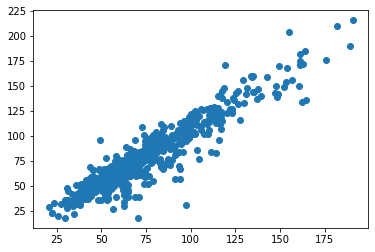

In [99]:
plt.scatter(genjet_pt,jet_pt)

In [91]:
import pandas as pd

In [100]:
df = pd.DataFrame({"GenJet_pt":genjet_pt,
                   "GenJet_eta":genjet_eta,
                   "GenJet_phi":genjet_phi,
                   "GenJet_mass":genjet_mass,
                 "Jet_pt":jet_pt})

In [101]:
df.head(5)

,GenJet_pt,GenJet_eta,GenJet_phi,GenJet_mass,Jet_pt
0,46.762245,0.622070,-1.729736,1.166992,49.81250
1,39.294693,0.867676,0.004482,7.308594,44.34375
2,99.933205,0.504272,1.444580,14.343750,103.25000
3,93.588135,3.361328,-1.821533,10.726562,83.43750
4,102.443871,0.119385,1.314453,18.625000,101.37500


In [102]:
df.to_csv('regression_data.csv', index = False)


In [ ]:
response_maker_nanov9(testing=False, do_gen=True, client=None, prependstr="/mnt/data/cms")


Processing:   0%|          | 0/557 [00:00<?, ?chunk/s]

In [56]:
with open("jet_output.pkl", "rb") as f:
    output = pickle.load( f )

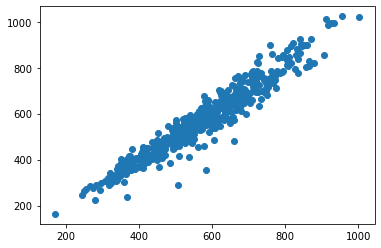

In [57]:
import matplotlib.pyplot as plt
plt.scatter(output[0][1:],output[1][1:])

In [54]:
3

3